In [4]:
import tensorflow as tf
from tensorflow.python.client import device_lib
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('water_potability.csv')

In [7]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

### Firstly, lets find out where the NaNs are

In [10]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### we have NaN values in the 'ph', 'Sulfate' and 'Trihalomethanes' columns.
#### the most NaN is 'Sulfate' with 781 NaN values
#### I do not believe we have enough NaN values to consider dropping the NaN values so I will instead opt for imputation
#### we are going to impute using a KNNimputer because it is a multivariate method - it uses all column data to impute for a single column

# histogram for each column

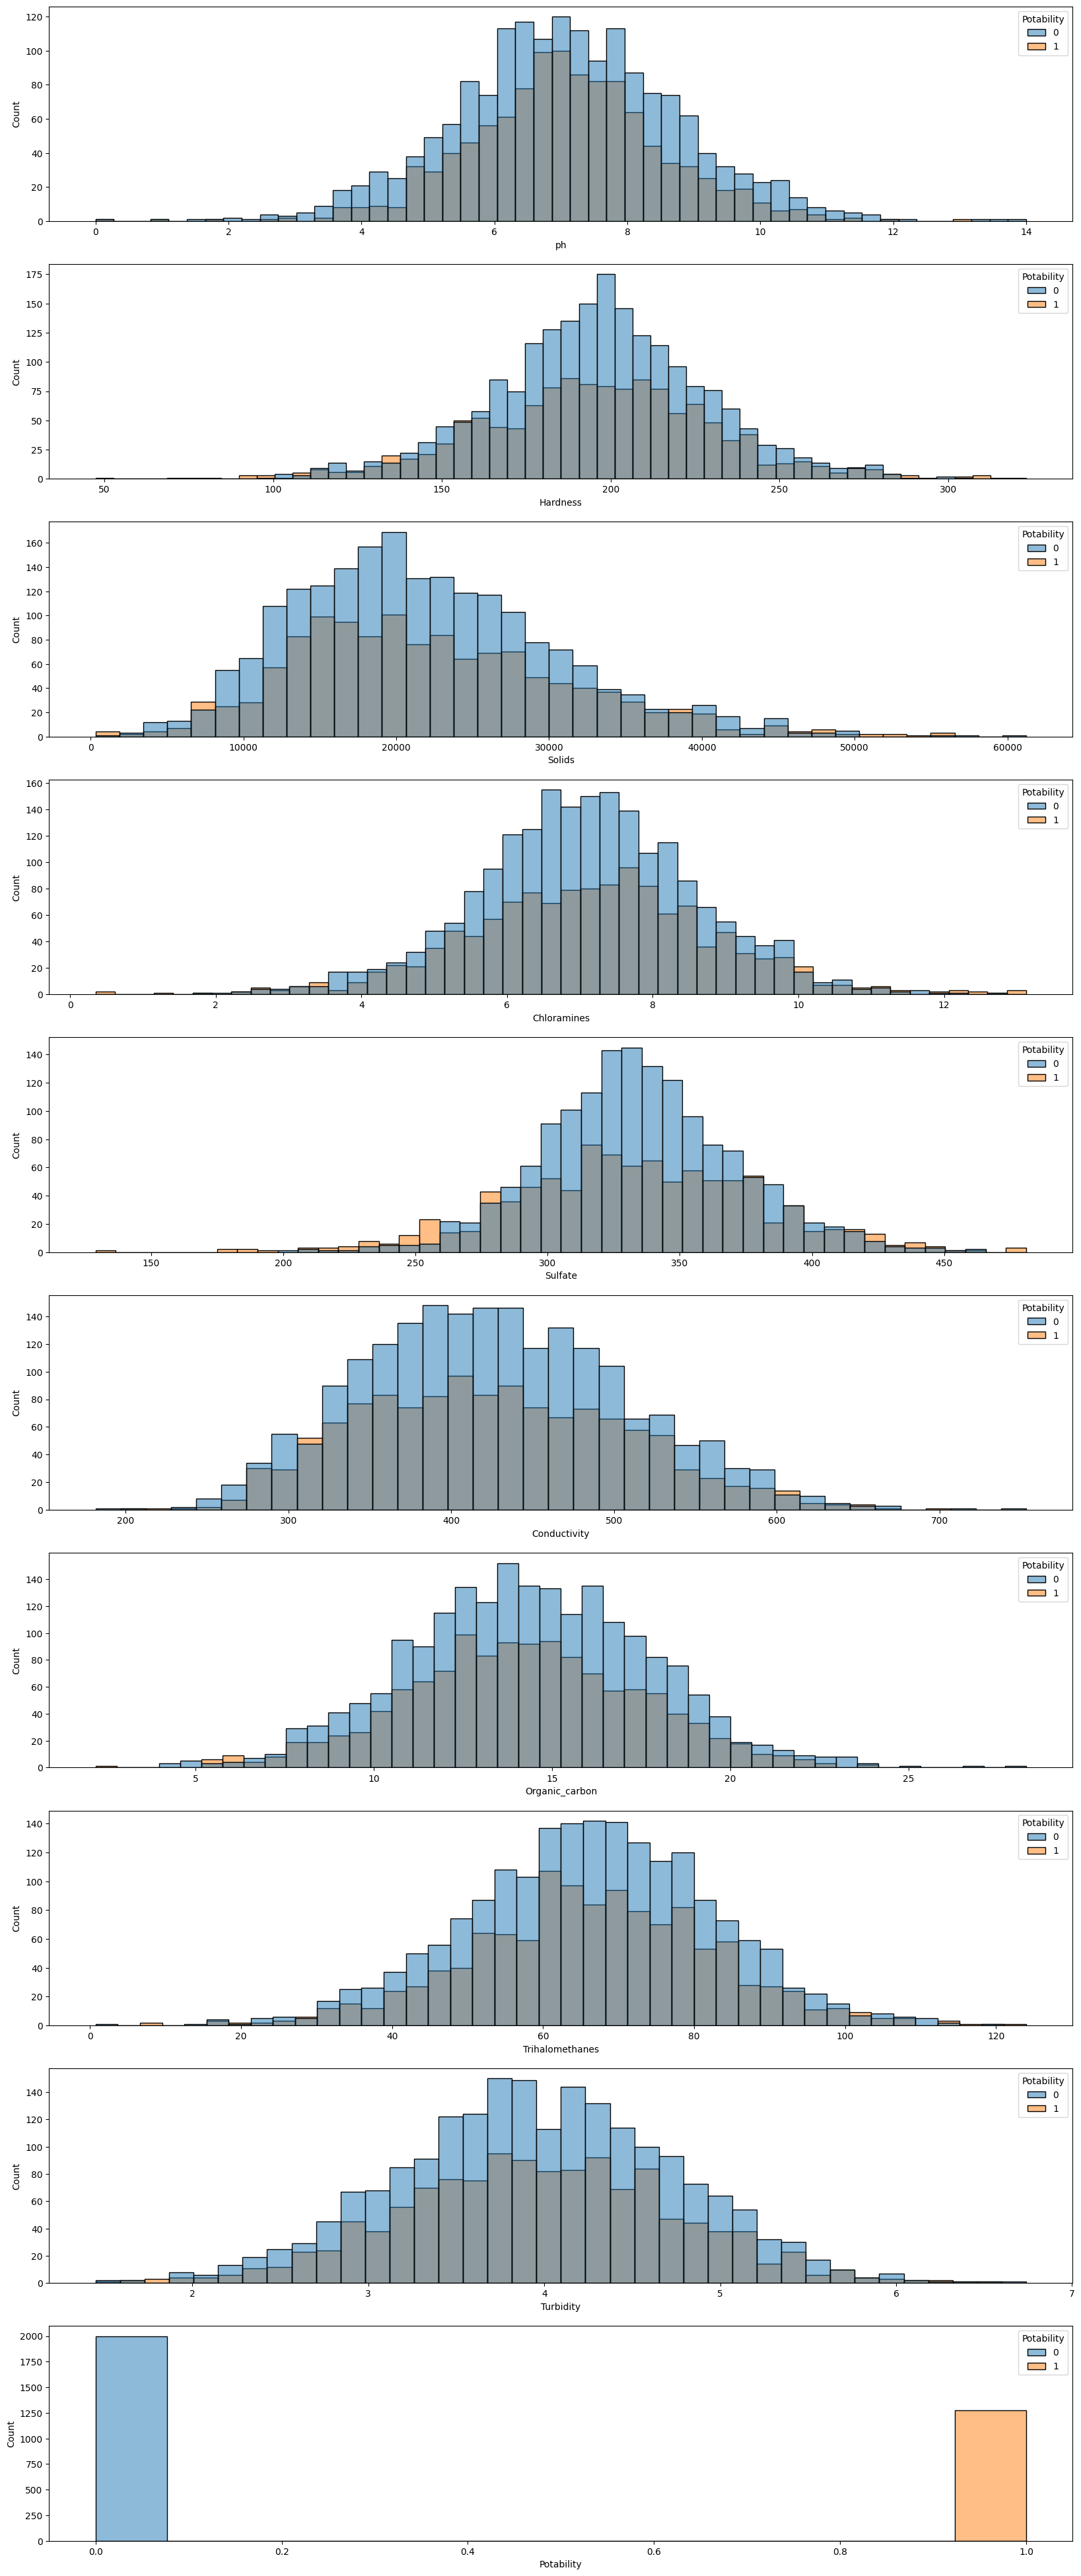

In [11]:
count = 1
plt.figure(figsize = (20, 60))
for column in df:
    plt.subplot(12,1,count)
    count = count + 1
    sbn.histplot(x = column, hue = 'Potability', data = df)
plt.show()

# boxplot for each column/attribute

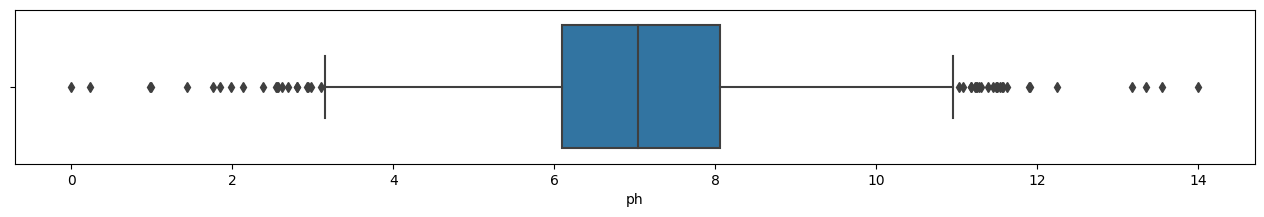

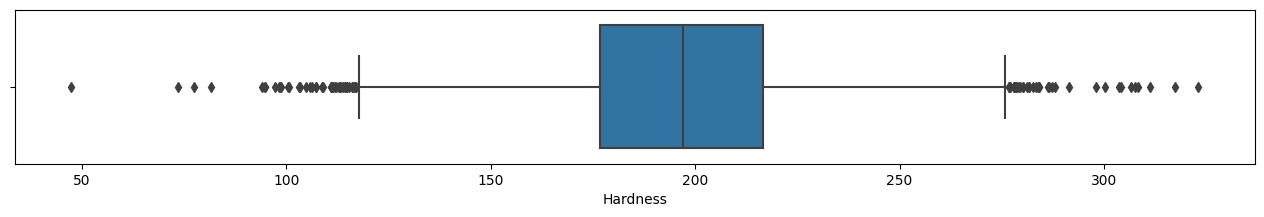

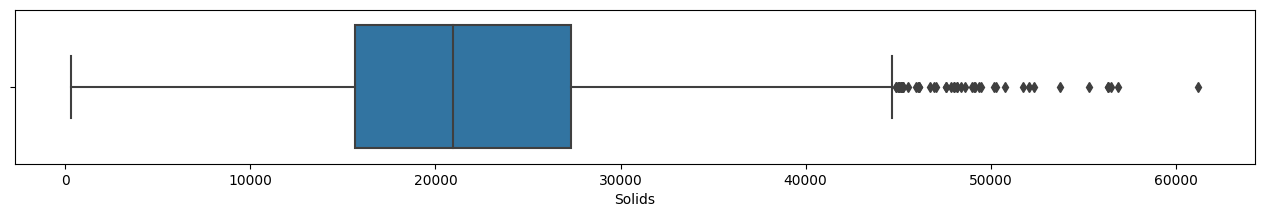

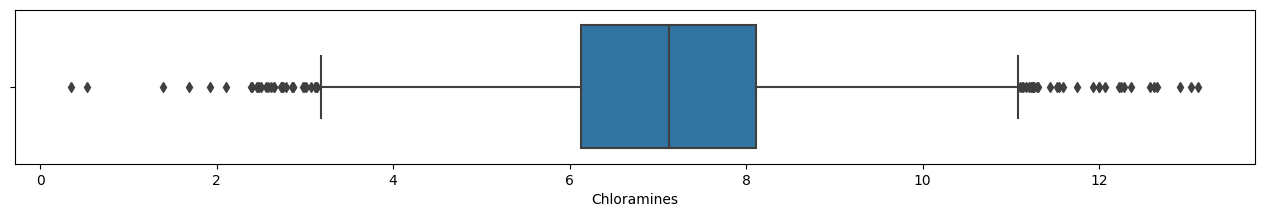

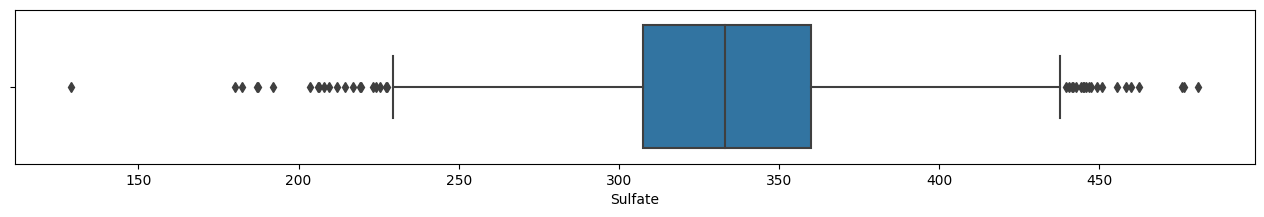

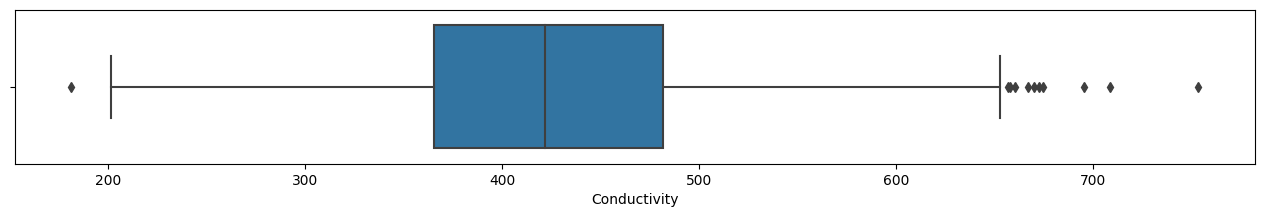

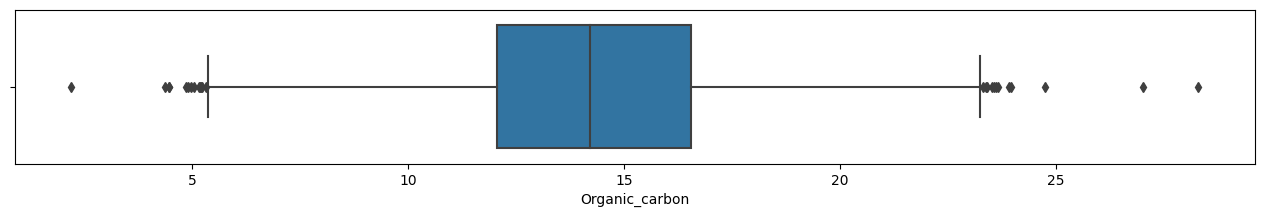

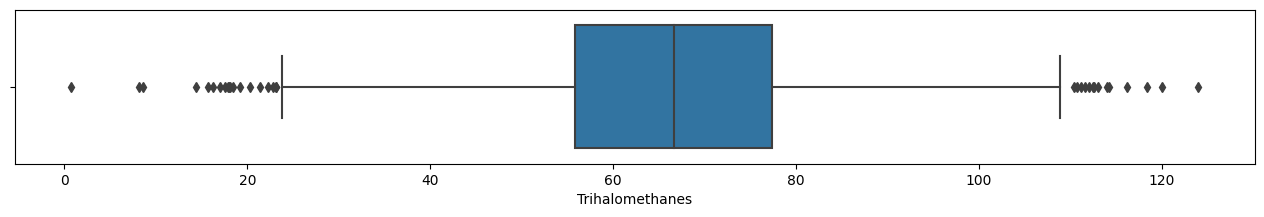

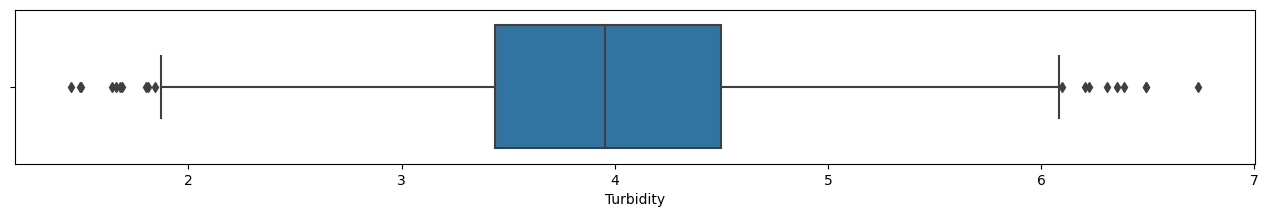

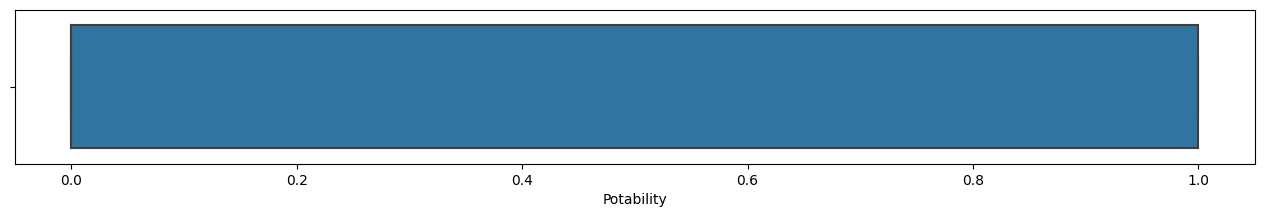

In [12]:

for column in df:
    plt.figure(figsize=(16,2))
    sbn.boxplot(data=df, x=column)

### we can see through our box plots and histograms that attribute 'solids' has a slight positive skew
#### if we plan on doing a statistical test such as Pearsons correlation, we may want to transform this skew

In [13]:
df['Solids_sqrt'] = np.sqrt(df['Solids'])

### Solids before transform

<Axes: xlabel='Solids', ylabel='Count'>

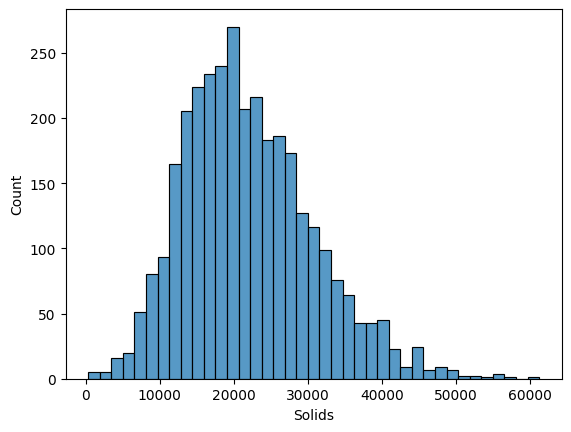

In [14]:
sbn.histplot(data=df, x="Solids")

## Solids after Square Root Transform

<Axes: xlabel='Solids_sqrt', ylabel='Count'>

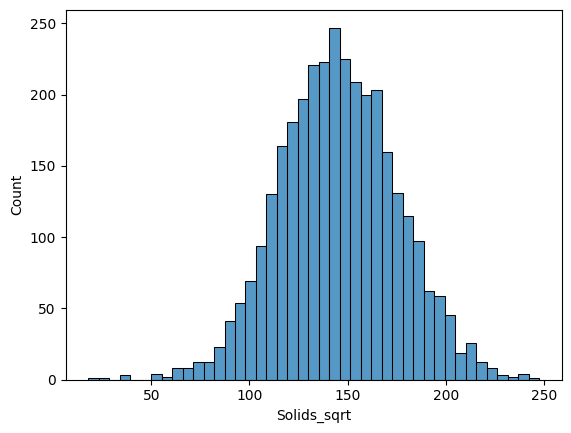

In [15]:
sbn.histplot(data=df, x="Solids_sqrt")

## lets check class balance

In [16]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

## Pairwise correlation 

In [17]:
df.corr(method='pearson')

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   
Solids_sqrt     -0.092277 -0.051505  0.988648    -0.071506 -0.172388   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915        0.003610        -0.013013  -0.014449   
Solids               0.013831        0.010242        -0.009143   0.019546   
Chloramines         -0.020486       -0.012653         0.017084   0.002363   
Sulfate             -0.016121        0.030831        -0.030274  -0.011187   
Conductivity         1.000000        0.020966         0.001285   0.005798   
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308   
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145   
Turbidity            0.005798       -0.027308        -0.022145   1.000000   
Potability          -0.008128       -0.030001         0.007130   0.001581   
Solids_sqrt          0.014542        0.008493        -0.009091   0.024858   

                 Potability  Solids_sqrt  
ph                -0.003556    -0.092277  
Hardness          -0.013837    -0.051505  
Solids             0.033743     0.988648  
Chloramines        0.023779    -0.071506  
Sulfate           -0.023577    -0.172388  
Conductivity      -0.008128     0.014542  
Organic_carbon    -0.030001     0.008493  
Trihalomethanes    0.007130    -0.009091  
Turbidity          0.001581     0.024858  
Potability         1.000000     0.028818  
Solids_sqrt        0.028818     1.000000

<Axes: >

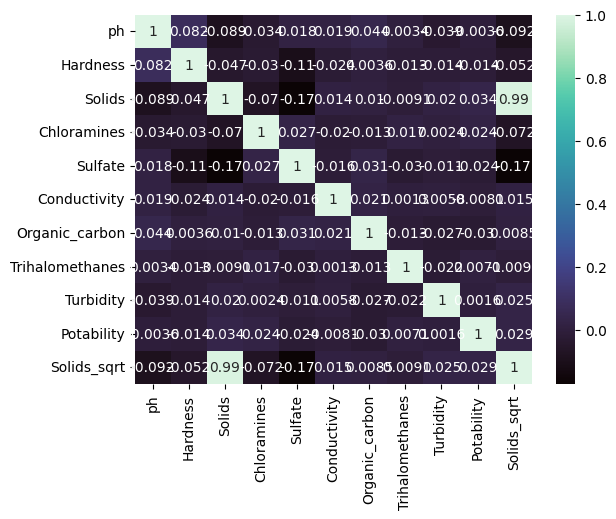

In [18]:

sbn.heatmap(df.corr(method='pearson'), cmap="mako", annot=True)

### using the correlation heatmap we can see most variables have close to 0 correlation between each other
##### this tells us that each variable could be usefull for our model, if two variables were highly correlated we could remove one or the other

# scatter plots

<Figure size 1300x1700 with 0 Axes>

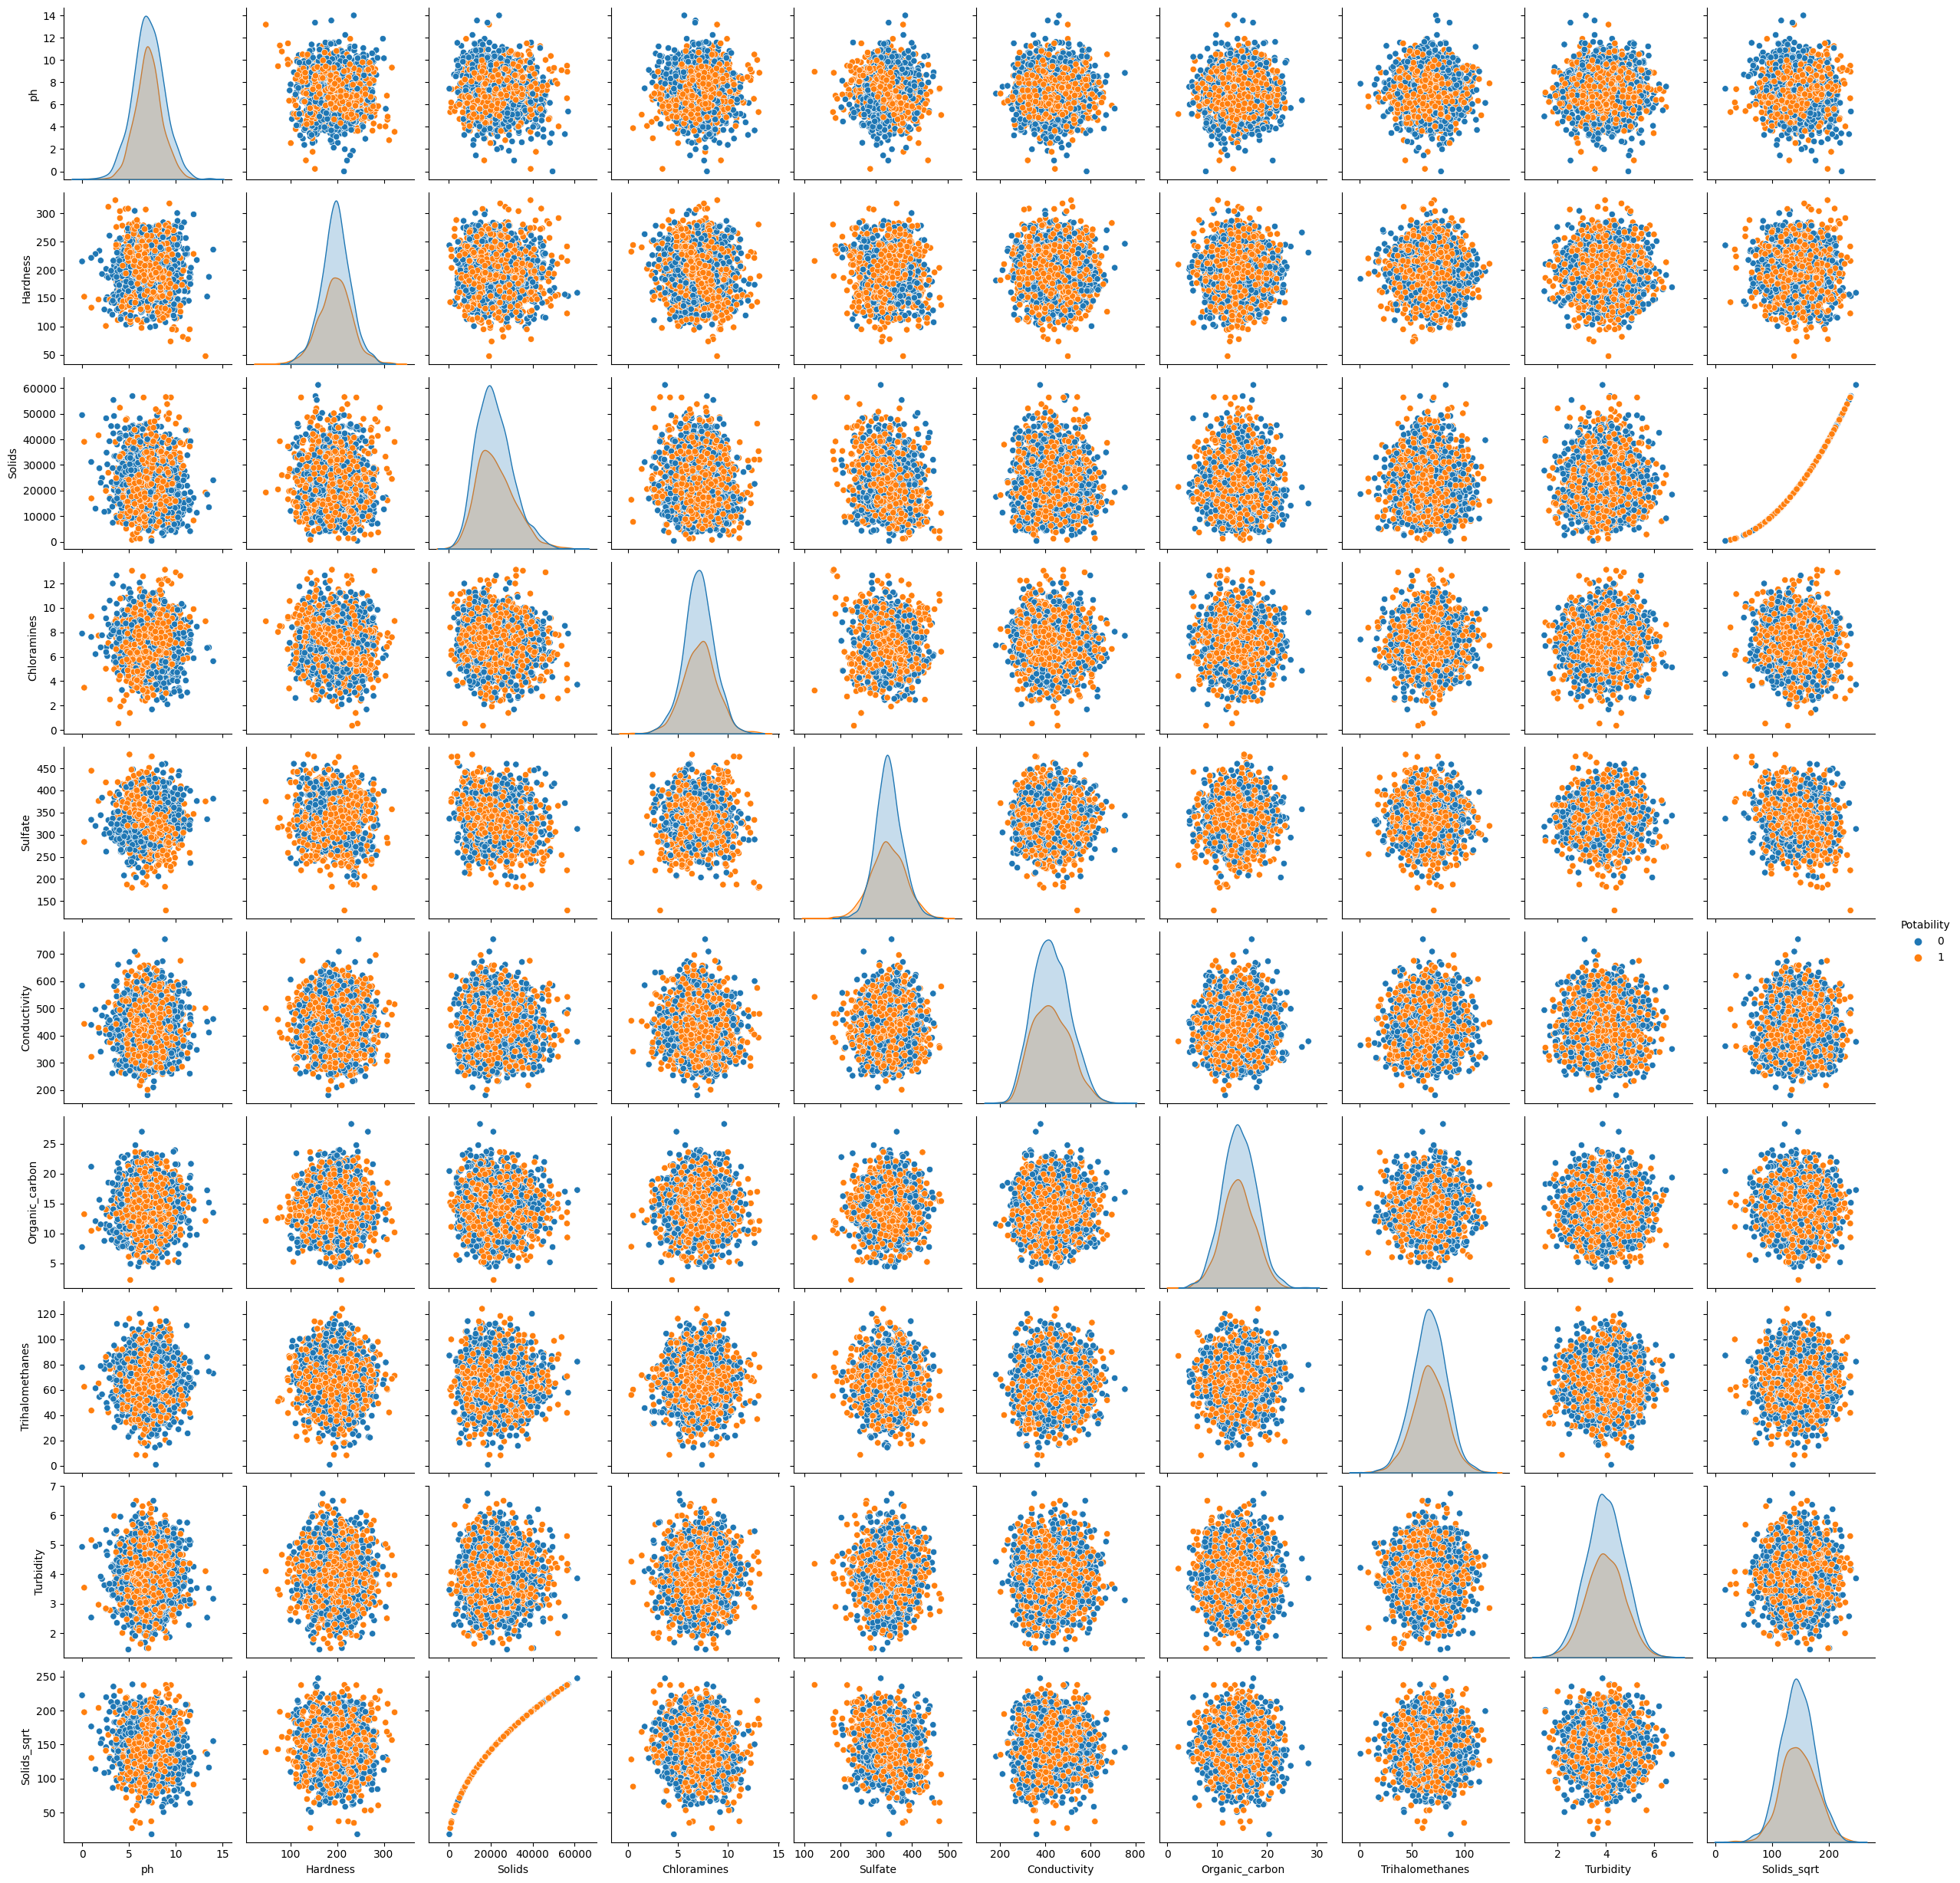

In [19]:
plt.figure(figsize=(13,17))
sbn.pairplot(data=df, hue="Potability")
plt.show()

## compare potability over attributes with violin plots

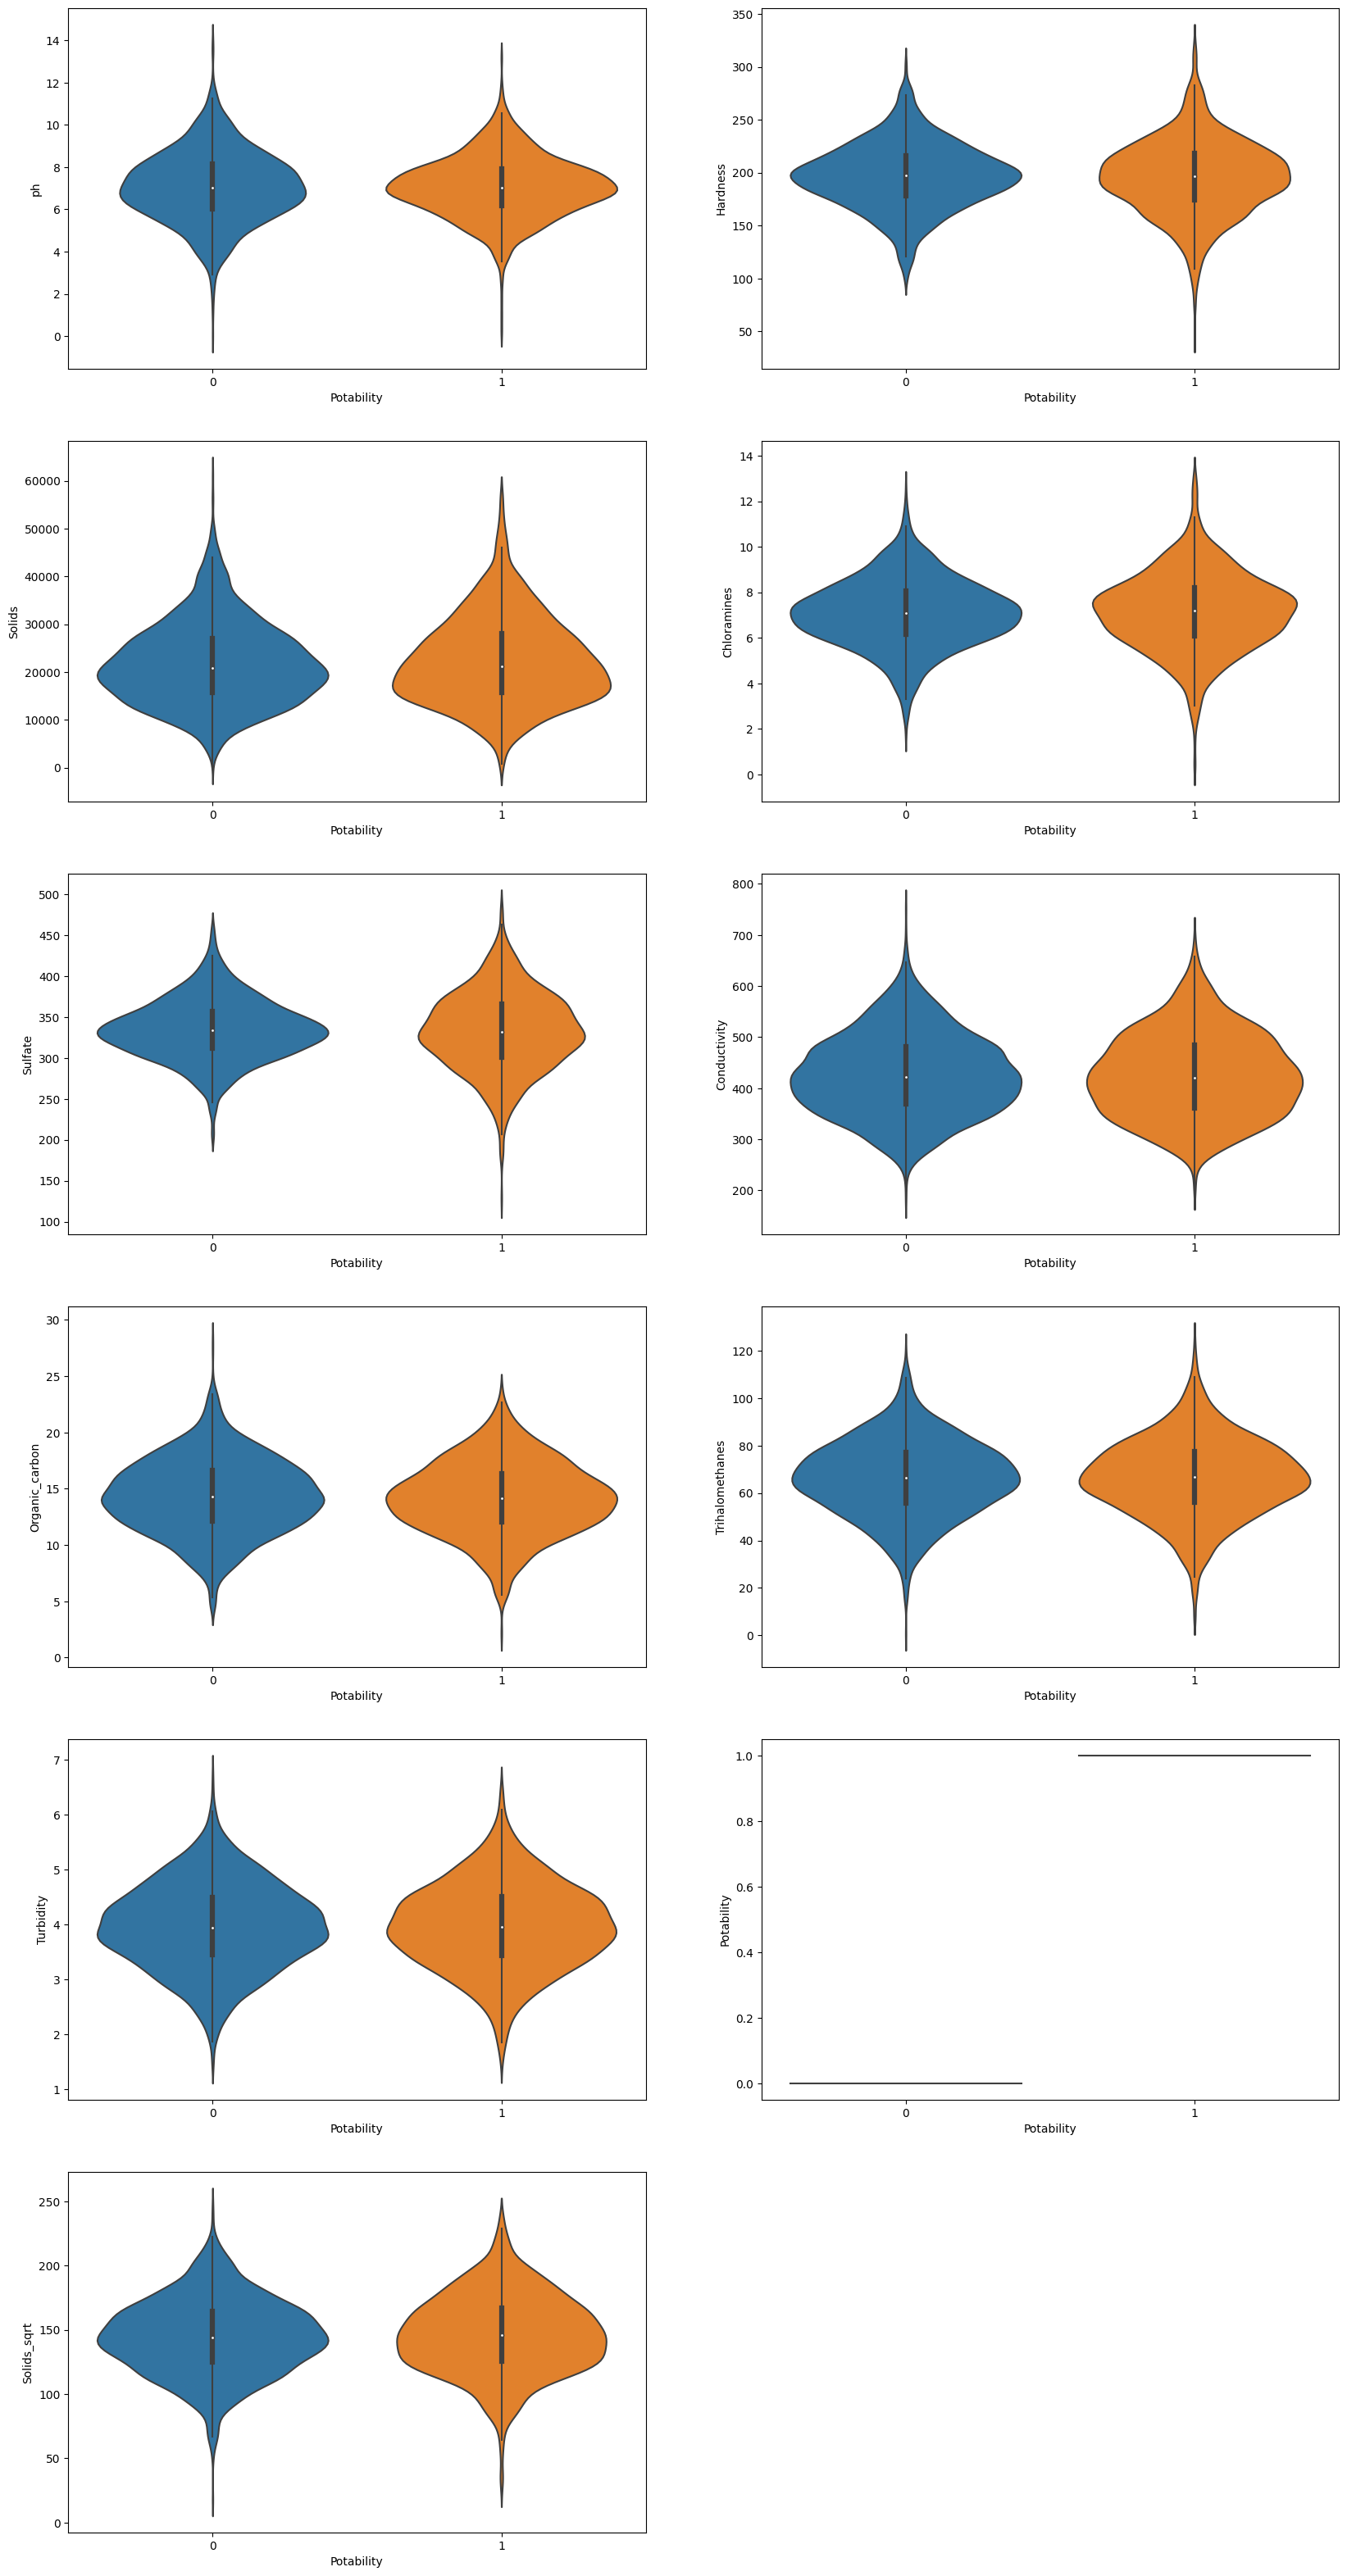

In [20]:
count = 1
plt.figure(figsize=(20,40))
for column in df:
    plt.subplot(6,2,count)
    count = count + 1
    sbn.violinplot(x = 'Potability', y = column, data = df)
plt.show()

# Split data into train and test set
### we are using cross validation to train and validate and to tune hyperparameters, therefore we need to hold some data aside for final testing as if we do not do this are hyperparameter tuning could overfit and lead to a model that is less usefull in application

In [31]:
y = df['Potability']
X = df.drop(columns=['Potability','Solids'])
y = y.values
X = X.values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Model Pipeline
## We are going to Impute null values and create a model with a pipeline
## I heavily followed the below guide to implement these steps
### https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/

In [33]:
from numpy import mean
from numpy import std
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#### it is key to note that if we impute using the whole dataset (including our y - Potability) imputation could lead to a leakage - since if Potability is used to aid in the imputation if we use this data to predict Potability the model may perform better since the imputed values are influenced by the value we are trying to predict.

In [34]:
for i in range(4):
    if i == 0:
        print('Random Forest')
        model = RandomForestClassifier()
    elif i == 1:
        print('KNN')
        model = KNeighborsClassifier(n_neighbors=5)
    elif i == 2:
        print('SVM')
        model = SVC()
    elif i == 3:
        print('Logistic Regression')
        model = LogisticRegression()
    imputer = KNNImputer(n_neighbors=8)
    pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Random Forest
Mean Accuracy: 0.673 (0.024)
KNN
Mean Accuracy: 0.592 (0.025)
SVM
Mean Accuracy: 0.608 (0.001)
Logistic Regression
Mean Accuracy: 0.608 (0.002)


### we can see that with the base models Random Forest has the best performance
#### but we have not looked into hyperparameter optimisation yet, lets try and do so with the Random Forest Classifier

 To get this section to work i refered to the following posts
 
 https://stackoverflow.com/a/55401454
 
 https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

I use 'm__' at the start of each hyperparameter so the RandomSearchCV can identify these params as belonging to the model part of the pipeline 'm'

In [35]:
from sklearn.model_selection import RandomizedSearchCV#
from sklearn.pipeline import make_pipeline

n_estimators = [100,200,300,400,600,800,1000,1250,1500,1750,2000]
max_depth = [5, 15, 26, 36, 47, 57, 68, 78, 89, 99, 110, None]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6]
bootstrap = [True, False]
random_grid = {'m__n_estimators': n_estimators,
               'm__max_depth': max_depth,
               'm__min_samples_split': min_samples_split,
               'm__min_samples_leaf': min_samples_leaf,
               'm__bootstrap': bootstrap
              }

In [36]:
model = RandomForestClassifier()
imputer = KNNImputer(n_neighbors=8)
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
model_random = RandomizedSearchCV(pipeline, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
model_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('i', KNNImputer(n_neighbors=8)),
                                             ('m', RandomForestClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'m__bootstrap': [True, False],
                                        'm__max_depth': [5, 15, 26, 36, 47, 57,
                                                         68, 78, 89, 99, 110,
                                                         None],
                                        'm__min_samples_leaf': [1, 2, 4, 6],
                                        'm__min_samples_split': [2, 5, 10, 15],
                                        'm__n_estimators': [100, 200, 300, 400,
                                                            600, 800, 1000,
                                                            1250, 1500, 1750,
                                                            2000]},
                   random_state=42, verbose=2)

In [37]:
model_random.best_params_

{'m__n_estimators': 800,
 'm__min_samples_split': 2,
 'm__min_samples_leaf': 2,
 'm__max_depth': 36,
 'm__bootstrap': False}

# Optimised Model Performance

In [41]:
model = RandomForestClassifier(n_estimators=800,min_samples_split=2,min_samples_leaf=2,max_depth=36,bootstrap=False)
imputer = KNNImputer(n_neighbors=8)
X_train = imputer.fit_transform(X_train)
model.fit(X_train, y_train)
X_test = imputer.fit_transform(X_test)
predicted = model.predict(X_test)

# Confusion Matrix on Test Set Results

In [46]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_pred=predicted, y_true=y_test)
print(results)

[[241  65]
 [109  77]]


## as you can see the model has a high false positive rate
### in this situation a false positive rate is much more undesireable than a false negative rate
### A false positive is saying that unsafe water is safe and this could lead to many issues such as illness
### you could also calculate accuracy as 241+77 / (109+77+65+241) = 0.646 
#### This accuracy suggests the model performs better than guessing, but not by much
#### other methods could be used, however, all models will be limited by the small dataset size